In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the uploaded CSV file
file_path = '/content/drive/MyDrive/Supply Chain Analytics/Final Project/filtered_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(                       time   latitude   longitude  depth   mag magType  \
 0  2024-02-12T08:42:48.620Z  32.799833 -115.565500  15.76  4.56      mw   
 1  2024-02-12T08:36:25.460Z  32.813500 -115.573500  17.93  4.81      mw   
 2  2024-02-09T21:47:27.320Z  34.057500 -118.907667  15.28  4.61      mw   
 3  2023-12-01T07:43:27.480Z  32.751833 -115.872833   8.69  4.80      mw   
 4  2023-10-16T10:20:49.740Z  40.315667 -124.054833  31.06  4.83      mw   
 
      nst    gap     dmin   rms  ...                   updated  \
 0   69.0   39.0  0.05410  0.30  ...  2024-03-27T11:09:03.359Z   
 1   71.0   39.0  0.05943  0.34  ...  2024-03-27T11:26:19.097Z   
 2  139.0  120.0  0.05360  0.28  ...  2024-04-19T15:48:02.237Z   
 3   95.0   29.0  0.11210  0.26  ...  2024-02-13T17:10:27.150Z   
 4   45.0   52.0  0.04720  0.12  ...  2024-01-06T18:47:18.663Z   
 
                        place        type horizontalError depthError  magError  \
 0  2 km NNW of El Centro, CA  earthquake            0.25     

In [ ]:
# Define the scaling function
def calculate_weights(magnitudes, min_mag=4.5, a=0.5):
    return np.exp(a * (magnitudes - min_mag))

# Calculate weights for the magnitudes in the dataset
data['weights'] = calculate_weights(data['mag'])

# Move the 'weights' column to position right after 'mag' column
mag_index = data.columns.get_loc('mag') + 1
columns = data.columns.tolist()
columns = columns[:mag_index] + ['weights'] + columns[mag_index:-1]

# Reorder columns
data = data[columns]

# Display the updated dataframe with weights
data.head()


,time,latitude,longitude,depth,mag,weights,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-02-12T08:42:48.620Z,32.799833,-115.565500,15.76,4.56,1.030455,mw,69.0,39.0,0.05410,...,2024-03-27T11:09:03.359Z,"2 km NNW of El Centro, CA",earthquake,0.25,0.39,NaN,6.0,reviewed,ci,ci
1,2024-02-12T08:36:25.460Z,32.813500,-115.573500,17.93,4.81,1.167658,mw,71.0,39.0,0.05943,...,2024-03-27T11:26:19.097Z,"3 km NNW of El Centro, CA",earthquake,0.30,0.56,NaN,6.0,reviewed,ci,ci
2,2024-02-09T21:47:27.320Z,34.057500,-118.907667,15.28,4.61,1.056541,mw,139.0,120.0,0.05360,...,2024-04-19T15:48:02.237Z,"11 km WNW of Malibu, CA",earthquake,0.23,0.28,NaN,6.0,reviewed,ci,ci
3,2023-12-01T07:43:27.480Z,32.751833,-115.872833,8.69,4.80,1.161834,mw,95.0,29.0,0.11210,...,2024-02-13T17:10:27.150Z,"11 km E of Ocotillo, CA",earthquake,0.17,0.56,NaN,6.0,reviewed,ci,ci
4,2023-10-16T10:20:49.740Z,40.315667,-124.054833,31.06,4.83,1.179393,mw,45.0,52.0,0.04720,...,2024-01-06T18:47:18.663Z,"20 km E of Petrolia, CA",earthquake,0.27,0.59,NaN,4.0,reviewed,nc,nc


In [ ]:
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

In [ ]:
# Define the polygons for each region
region_polygons = {
    'Northern': Polygon([
        (-124.0, 42.0),
        (-120.0, 42.0),
        (-120.0, 38.5),
        (-124.0, 38.5),
        (-124.0, 42.0) # Closing the loop
    ]),
    'Bay Area': Polygon([
        (-123.0, 38.5),
        (-121.5, 38.5),
        (-121.5, 37.0),
        (-123.0, 37.0),
        (-123.0, 38.5) # Closing the loop
    ]),
    'Central': Polygon([
        (-121.5, 38.5),
        (-118.0, 38.5),
        (-118.0, 35.5),
        (-121.5, 35.5),
        (-121.5, 38.5) # Closing the loop
    ]),
    'Central Coast': Polygon([
        (-121.5, 37.0),
        (-120.0, 37.0),
        (-120.0, 34.5),
        (-121.5, 34.5),
        (-121.5, 37.0) # Closing the loop
    ]),
    'Deserts': Polygon([
        (-117.5, 37.0),
        (-114.5, 37.0),
        (-114.5, 34.0),
        (-117.5, 34.0),
        (-117.5, 37.0) # Closing the loop
    ]),
    'Southern': Polygon([
        (-117.5, 34.5),
        (-114.5, 34.5),
        (-114.5, 32.5),
        (-117.5, 32.5),
        (-117.5, 34.5) # Closing the loop
    ])
}

In [ ]:
pip install matplotlib geopandas

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

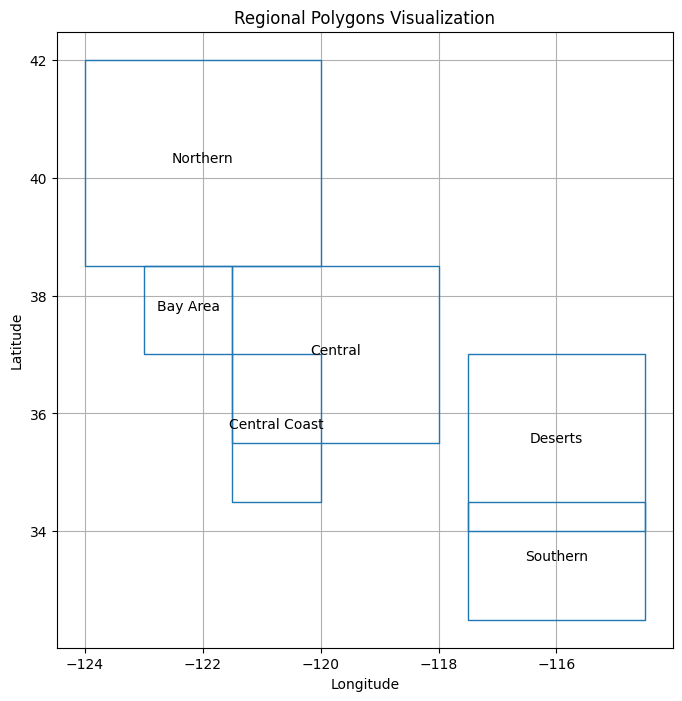

In [ ]:
# Convert the dictionary into a GeoDataFrame
gdf = gpd.GeoDataFrame({
    'Region': region_polygons.keys(),
    'geometry': region_polygons.values()
})

# Plot the polygons
fig, ax = plt.subplots(figsize=(10, 8))
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.apply(lambda x: ax.annotate(text=x['Region'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.title('Regional Polygons Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
# Function to determine the closest region for a point, considering polygon overlaps
def determine_closest_region_corrected(latitude, longitude, region_polygons):
    point = Point(longitude, latitude)
    min_distance = None
    closest_region = "Undefined"

    # Priority list of regions to check for containment first
    region_priority = ['Northern', 'Bay Area', 'Central', 'Central Coast', 'Deserts', 'Southern']

    # Check for exact containment first
    for region in region_priority:
        polygon = region_polygons[region]
        if polygon.contains(point):
            return region

    # If no exact containment, check for closest polygon
    for region, polygon in region_polygons.items():
        # Find the nearest point on the polygon boundary to the earthquake point
        nearest_point = nearest_points(point, polygon.boundary)[1]
        distance = point.distance(nearest_point)
        if min_distance is None or distance < min_distance:
            min_distance = distance
            closest_region = region

    return closest_region

# Apply the corrected function to a small subset of data to ensure correctness
subset = data.iloc[:100].copy() # Change this to a larger number or remove it to run on full dataset
subset['corrected_region'] = subset.apply(
    lambda row: determine_closest_region_corrected(row['latitude'], row['longitude'], region_polygons),
    axis=1
)

# Check the distribution of regions to ensure they are now categorized correctly
subset['corrected_region'].value_counts()


corrected_region
Deserts          36
Northern         31
Central          18
Southern         11
Central Coast     3
Bay Area          1
Name: count, dtype: int64

In [ ]:
# Function to determine the closest region for a point
def determine_closest_region(latitude, longitude, region_polygons):
    point = Point(longitude, latitude)
    min_distance = None
    closest_region = "Undefined"

    for region, polygon in region_polygons.items():
        if polygon.contains(point):
            return region
        else:
            # Find the nearest point on the polygon boundary to the earthquake point
            nearest_point = nearest_points(point, polygon.boundary)[1]
            distance = point.distance(nearest_point)
            if min_distance is None or distance < min_distance:
                min_distance = distance
                closest_region = region

    return closest_region

# Apply the function to each earthquake in the dataset to determine its region
data['region'] = data.apply(
    lambda row: determine_closest_region(row['latitude'], row['longitude'], region_polygons),
    axis=1
)

# Check the first few rows to verify the regions are assigned
data[['latitude', 'longitude', 'region']]


,latitude,longitude,region
0,32.799833,-115.565500,Southern
1,32.813500,-115.573500,Southern
2,34.057500,-118.907667,Central Coast
3,32.751833,-115.872833,Southern
4,40.315667,-124.054833,Northern
...,...,...,...
1261,34.000000,-119.500000,Central Coast
1262,38.000000,-118.300000,Central
1263,33.500000,-117.000000,Southern
1264,41.500000,-125.000000,Northern


In [ ]:
# Read the uploaded CSV file containing California county demographics
county_data_path = '/content/drive/MyDrive/Supply Chain Analytics/Final Project/California_DemographicsByCounty_sample.csv'
county_data = pd.read_csv(county_data_path)

# Dictionary to hold the county to region mapping
county_to_region_mapping = {
    'Northern': [
        "Del Norte", "Humboldt", "Mendocino", "Sonoma", "Napa", "Solano",
        "Marin", "Lake", "Tehama", "Glenn", "Butte", "Plumas", "Shasta",
        "Lassen", "Modoc", "Siskiyou", "Trinity", "Colusa", "Sutter",
        "Yuba", "Sierra"
    ],
    'Bay Area': [
        "San Francisco", "Alameda", "Contra Costa", "San Mateo", "Santa Clara",
        "Marin", "Napa", "Sonoma", "Solano"
    ],
    'Central': [
        "San Joaquin", "Stanislaus", "Merced", "Madera", "Fresno", "Kings",
        "Tulare", "Kern", "Alpine", "Amador", "Calaveras", "Tuolumne",
        "El Dorado", "Mariposa", "Nevada", "Placer", "Sacramento", "Yolo"
    ],
    'Central Coast': [
        "Monterey", "San Luis Obispo", "Santa Barbara", "Santa Cruz",
        "San Benito"
    ],
    'Deserts': [
        "Inyo", "Imperial", "San Bernardino", "Riverside", "Mono"
    ],
    'Southern': [
        "Los Angeles", "Orange", "San Diego", "Ventura"
    ]
}


In [ ]:
# Function to get the region from the county name
def get_region_from_county(county_name, mapping):
    for region, counties in mapping.items():
        if county_name.replace(" County", "") in counties:
            return region
    return "Undefined"

# Remove 'County' from the 'Geography' column for easier mapping
county_data['Geography'] = county_data['Geography'].str.replace(" County", "")

# Map the regions
county_data['region'] = county_data['Geography'].apply(lambda x: get_region_from_county(x, county_to_region_mapping))

# Check the mapping
county_data[['Geography', 'region']].head()

,Geography,region
0,Alameda,Bay Area
1,Alpine,Central
2,Amador,Central
3,Butte,Northern
4,Calaveras,Central


In [ ]:
region_populations = county_data.groupby('region', observed=True)['population'].sum()
region_populations = region_populations.to_frame().reset_index()

In [ ]:
county_data = pd.merge(county_data.drop(columns=['most_current_pop_year'], inplace=False), region_populations, on='region', suffixes=('_county', '_region'))

county_data = county_data.groupby('region')['population_region'].mean()

county_data

region
Bay Area          6348588.0
Central           6969049.0
Central Coast     1497858.0
Deserts           4821676.0
Northern          2475306.0
Southern         17243627.0
Name: population_region, dtype: float64

In [ ]:
# Map data and county
merged_data = pd.merge(data, county_data, on='region', how='left')

In [ ]:
# from google.colab import files

# Assuming 'merged_data' is the DataFrame you want to save as a CSV
# merged_data.to_csv('Merged_Data.csv', index=False)

# Use the files.download function to prompt a download in the browser
# files.download('Merged_Data.csv')

✌

In [ ]:
merged_data.head()  #duplicate data

,time,latitude,longitude,depth,mag,weights,magType,nst,gap,dmin,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,region,population_region
0,2024-02-12T08:42:48.620Z,32.799833,-115.565500,15.76,4.56,1.030455,mw,69.0,39.0,0.05410,...,earthquake,0.25,0.39,NaN,6.0,reviewed,ci,ci,Southern,17243627.0
1,2024-02-12T08:36:25.460Z,32.813500,-115.573500,17.93,4.81,1.167658,mw,71.0,39.0,0.05943,...,earthquake,0.30,0.56,NaN,6.0,reviewed,ci,ci,Southern,17243627.0
2,2024-02-09T21:47:27.320Z,34.057500,-118.907667,15.28,4.61,1.056541,mw,139.0,120.0,0.05360,...,earthquake,0.23,0.28,NaN,6.0,reviewed,ci,ci,Central Coast,1497858.0
3,2023-12-01T07:43:27.480Z,32.751833,-115.872833,8.69,4.80,1.161834,mw,95.0,29.0,0.11210,...,earthquake,0.17,0.56,NaN,6.0,reviewed,ci,ci,Southern,17243627.0
4,2023-10-16T10:20:49.740Z,40.315667,-124.054833,31.06,4.83,1.179393,mw,45.0,52.0,0.04720,...,earthquake,0.27,0.59,NaN,4.0,reviewed,nc,nc,Northern,2475306.0


In [ ]:
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]


In [ ]:
merged_data.head()

,time,latitude,longitude,depth,mag,weights,magType,nst,gap,dmin,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,region,population_region
0,2024-02-12T08:42:48.620Z,32.799833,-115.565500,15.76,4.56,1.030455,mw,69.0,39.0,0.05410,...,earthquake,0.25,0.39,NaN,6.0,reviewed,ci,ci,Southern,17243627.0
1,2024-02-12T08:36:25.460Z,32.813500,-115.573500,17.93,4.81,1.167658,mw,71.0,39.0,0.05943,...,earthquake,0.30,0.56,NaN,6.0,reviewed,ci,ci,Southern,17243627.0
2,2024-02-09T21:47:27.320Z,34.057500,-118.907667,15.28,4.61,1.056541,mw,139.0,120.0,0.05360,...,earthquake,0.23,0.28,NaN,6.0,reviewed,ci,ci,Central Coast,1497858.0
3,2023-12-01T07:43:27.480Z,32.751833,-115.872833,8.69,4.80,1.161834,mw,95.0,29.0,0.11210,...,earthquake,0.17,0.56,NaN,6.0,reviewed,ci,ci,Southern,17243627.0
4,2023-10-16T10:20:49.740Z,40.315667,-124.054833,31.06,4.83,1.179393,mw,45.0,52.0,0.04720,...,earthquake,0.27,0.59,NaN,4.0,reviewed,nc,nc,Northern,2475306.0


In [ ]:
# Re-confirming 'time' column conversion to datetime format and extracting the year
merged_data['time'] = pd.to_datetime(merged_data['time'])
merged_data['year'] = merged_data['time'].dt.year

# Proceeding with the calculations as described earlier
# Grouping by region to sum population and calculate the weighted average of earthquake magnitudes
grouped_data = merged_data.groupby('region')

# Calculating the weighted average of earthquake magnitudes
weighted_average_magnitude = grouped_data.apply(
    lambda x: (x['mag'] * x['weights']).sum() / x['weights'].sum())

# For frequency, calculate the total counts of events by year for each region
yearly_frequency = merged_data.groupby(['region', 'year']).size().unstack(fill_value=0)

# Calculate yearly standard deviation for each region
yearly_standard_deviation = yearly_frequency.std(axis=1)

# Combine all calculations into a single dataframe
result = pd.DataFrame({
    'Weighted_Average_Earthquake_Magnitude': weighted_average_magnitude,
    'Yearly_Standard_Deviation': yearly_standard_deviation
})

result = result.reset_index()  # Reset index to ensure the 'region' column is visible

result = pd.merge(result, region_populations, on='region') # Add regional populations (2022 census)

result = result.rename(columns={'population': 'Population', 'region': 'Region'}) # Rename columns

result = result.reindex(columns=['Region', 'Population', 'Weighted_Average_Earthquake_Magnitude', 'Yearly_Standard_Deviation']) # Re-order columns

result

,Region,Population,Weighted_Average_Earthquake_Magnitude,Yearly_Standard_Deviation
0,Bay Area,6348588,5.021592,1.725009
1,Central,6969049,4.972134,7.513920
2,Central Coast,1497858,4.995538,0.840875
3,Deserts,4821676,4.921553,6.366294
4,Northern,2475306,5.024065,2.295274
5,Southern,17243627,4.905729,4.058599


In [ ]:
# Adjust the population figures by dividing by 1 million for easier interpretation
result['Population'] = result['Population'] / 1e6  # Dividing by 1 million

# Display the updated results
result

,Region,Population,Weighted_Average_Earthquake_Magnitude,Yearly_Standard_Deviation
0,Bay Area,6.348588,5.021592,1.725009
1,Central,6.969049,4.972134,7.513920
2,Central Coast,1.497858,4.995538,0.840875
3,Deserts,4.821676,4.921553,6.366294
4,Northern,2.475306,5.024065,2.295274
5,Southern,17.243627,4.905729,4.058599


In [ ]:
# Add number of helicopters needed by each region
heli_per_million = 5
result['HelicopterDemand'] = result['Population'] * heli_per_million

result

,Region,Population,Weighted_Average_Earthquake_Magnitude,Yearly_Standard_Deviation,HelicopterDemand
0,Bay Area,6.348588,5.021592,1.725009,31.742940
1,Central,6.969049,4.972134,7.513920,34.845245
2,Central Coast,1.497858,4.995538,0.840875,7.489290
3,Deserts,4.821676,4.921553,6.366294,24.108380
4,Northern,2.475306,5.024065,2.295274,12.376530
5,Southern,17.243627,4.905729,4.058599,86.218135


# Optimization Model

1. Center Setup and Operation Costs:

2. Demand Correlation Coefficient: A list of coefficients between -1 (perfectly inversely correlated) and 1 (perfectly correlated)

3. Distance Matrix: The distances between regions in miles. For simplicity, we'll assume a symmetric matrix.

In [ ]:

# Potential correlation coefficients between -1 and 1
correlation_coefficients = np.linspace(-1, 1, 10)

# Fixed and variable costs
fixed_costs = {
    'center_building_cost': 50000,
    'regional_hub_cost': 25000,
    'maintenance_annual_cost': 1200,
    'utilities_annual_cost': 3000
}
variable_cost = {
    'per_mileage_helicopter_cost': 50
}

# Define the cost of one helicopter
helicopter_cost = {
    'cost_per_helicopter': 10000
}

# Display the costs and generated coefficients
correlation_coefficients, fixed_costs, variable_cost, helicopter_cost


(array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
         0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ]),
 {'center_building_cost': 50000,
  'regional_hub_cost': 25000,
  'maintenance_annual_cost': 1200,
  'utilities_annual_cost': 3000},
 {'per_mileage_helicopter_cost': 50},
 {'cost_per_helicopter': 10000})

In [ ]:
import geopy.distance

In [ ]:
# Calculate the centroid for each region
region_centroids = {region: list(polygon.centroid.coords)[0] for region, polygon in region_polygons.items()}

# Calculate the distances between each pair of centroids
distances = {}
for region1, coord1 in region_centroids.items():
    distances[region1] = {}
    for region2, coord2 in region_centroids.items():
        if region1 == region2:
            # Distance from a region to itself is 0
            distances[region1][region2] = 0
        else:
            # Calculate the Haversine distance between centroids
            distances[region1][region2] = geopy.distance.distance(coord1[::-1], coord2[::-1]).miles

distances_df = pd.DataFrame(distances)
distances_df

,Northern,Bay Area,Central,Central Coast,Deserts,Southern
Northern,0.000000,172.978593,255.079079,317.763951,463.362799,571.630380
Bay Area,172.978593,0.000000,146.985227,161.075765,380.334990,457.640289
Central,255.079079,146.985227,0.000000,102.650826,233.548984,321.168540
Central Coast,317.763951,161.075765,102.650826,0.000000,267.901961,311.890540
Deserts,463.362799,380.334990,233.548984,267.901961,0.000000,137.859265
Southern,571.630380,457.640289,321.168540,311.890540,137.859265,0.000000


Actual Model

In [ ]:
# Function to simulate demand based on correlation
def simulate_demand(correlation, means, std_devs, population):
    # Assume a multivariate normal distribution of demand
    # The covariance matrix is based on the correlation coefficient
    covariance_matrix = np.diag(std_devs) @ np.full((len(std_devs), len(std_devs)), correlation) @ np.diag(std_devs)
    np.fill_diagonal(covariance_matrix, std_devs ** 2)  # Variances remain the same, covariances are adjusted

    simulated_demands = np.random.multivariate_normal(means*population, covariance_matrix)
    return np.clip(simulated_demands, 0, None)  # Clip to ensure no negative demand


In [ ]:
mean_demand = result['Weighted_Average_Earthquake_Magnitude'].values
std_dev_demand = result['Yearly_Standard_Deviation'].values
population = result['Population'].values

In [ ]:
from itertools import product

In [ ]:
def calculate_variable_cost(distance, base_cost_per_mile, increase_per_mile, threshold_distance):
    # Apply the base cost up to the threshold distance
    # Beyond that, apply the increased cost
    if distance <= threshold_distance:
        return distance * base_cost_per_mile
    else:
        return (threshold_distance * base_cost_per_mile) + \
               ((distance - threshold_distance) * (base_cost_per_mile + increase_per_mile))


In [ ]:
def evaluate_all_configurations(helicopter_demands, distances_df, fixed_costs, variable_cost, helicopter_cost, northern_index, southern_index):
    regions = list(distances_df.index)
    configurations = list(product([True, False], repeat=len(regions)))

    best_configuration = None
    lowest_cost = float('inf')

    for config in configurations:
        # Skip configurations that centralize both 'Northern' and 'Southern'
        if config[northern_index] and config[southern_index]:
            continue

        total_fixed_cost = 0
        total_variable_cost = 0
        is_any_centralized = any(config)

        for is_centralized, region in zip(config, regions):
            region_index = regions.index(region)
            helicopters_needed = np.ceil(helicopter_demands[region_index])

            if is_centralized and is_any_centralized:
                total_fixed_cost += fixed_costs['center_building_cost']
                is_any_centralized = False  # Ensure we don't add the cost again

            if not is_centralized:
                total_fixed_cost += fixed_costs['regional_hub_cost']
                total_fixed_cost += helicopters_needed * helicopter_cost['cost_per_helicopter']

            if is_centralized:
                for other_region in regions:
                    if other_region != region:
                        distance = distances_df.loc[region, other_region]
                        total_variable_cost += calculate_variable_cost(distance, variable_cost['per_mileage_helicopter_cost'], 5, 150)

        total_cost = total_fixed_cost + total_variable_cost

        if total_cost < lowest_cost:
            lowest_cost = total_cost
            best_configuration = config

    return best_configuration, lowest_cost


In [ ]:
# Ensure regions is a list
regions = list(distances_df.index)

helicopter_demands = result['HelicopterDemand'].values

# 'regions' and 'helicopter_demands' are already defined as shown previously
northern_index = regions.index('Northern')
southern_index = regions.index('Southern')

for correlation in correlation_coefficients:
    # Now we pass only the needed arguments to the function
    best_config, lowest_cost = evaluate_all_configurations(
        helicopter_demands, distances_df, fixed_costs, variable_cost, helicopter_cost, northern_index, southern_index
    )
    # Print the best configuration and its total cost for this correlation coefficient
    centralized_regions = [regions[i] for i, centralized in enumerate(best_config) if centralized]
    decentralized_regions = [regions[i] for i, centralized in enumerate(best_config) if not centralized]

    print(f"Correlation: {correlation}")
    print(f"Best Configuration Total Cost: {lowest_cost}")
    print(f"Centralized Regions: {centralized_regions}")
    print(f"Decentralized Regions: {decentralized_regions}")
    print("Configuration Details:")
    for region, is_centralized in zip(regions, best_config):
        # Print configuration details with the constraint that Northern and Southern cannot both be centralized
        if is_centralized and ((region == 'Northern' and best_config[southern_index]) or
                               (region == 'Southern' and best_config[northern_index])):
            print(f"  {region}: Decentralized (due to constraint)")
        else:
            print(f"  {region}: {'Centralized' if is_centralized else 'Decentralized'}")
    print("\n" * 2)  # Print extra newline for readability


Correlation: -1.0
Best Configuration Total Cost: 748584.5005748186
Centralized Regions: ['Bay Area', 'Central', 'Central Coast', 'Deserts', 'Southern']
Decentralized Regions: ['Northern']
Configuration Details:
  Northern: Decentralized
  Bay Area: Centralized
  Central: Centralized
  Central Coast: Centralized
  Deserts: Centralized
  Southern: Centralized



Correlation: -0.7777777777777778
Best Configuration Total Cost: 748584.5005748186
Centralized Regions: ['Bay Area', 'Central', 'Central Coast', 'Deserts', 'Southern']
Decentralized Regions: ['Northern']
Configuration Details:
  Northern: Decentralized
  Bay Area: Centralized
  Central: Centralized
  Central Coast: Centralized
  Deserts: Centralized
  Southern: Centralized



Correlation: -0.5555555555555556
Best Configuration Total Cost: 748584.5005748186
Centralized Regions: ['Bay Area', 'Central', 'Central Coast', 'Deserts', 'Southern']
Decentralized Regions: ['Northern']
Configuration Details:
  Northern: Decentralized
  Bay A

Sensitivity Analysis

In [ ]:
from collections import Counter

In [ ]:
def perform_sensitivity_analysis(helicopter_demands, distances_df, fixed_costs, variable_cost, helicopter_cost, regions):
    # Define the ranges for sensitivity analysis
    center_building_costs = np.linspace(10000, 300000, 5)
    regional_hub_costs = center_building_costs/2
    per_mile_costs = np.linspace(10, 100, 5)

    # Get indices for the Northern and Southern regions
    northern_index = regions.index('Northern')
    southern_index = regions.index('Southern')

    # This will track how many times each configuration comes up as the best
    configuration_counts = Counter()

    # Perform the analysis
    for center_cost in center_building_costs:
        for regional_cost in regional_hub_costs:
            for per_mile_cost in per_mile_costs:
                # Update the costs for this iteration
                fixed_costs['center_building_cost'] = center_cost
                fixed_costs['regional_hub_cost'] = regional_cost
                variable_cost['per_mileage_helicopter_cost'] = per_mile_cost

                # Find the best configuration with these cost parameters
                best_config, _ = evaluate_all_configurations(
                    helicopter_demands, distances_df, fixed_costs, variable_cost, helicopter_cost, northern_index, southern_index
                )

                # Convert the configuration tuple to a readable string or another identifiable format
                config_str = ', '.join([
                    f"{'Centralized' if is_centralized else 'Decentralized'}: {region}"
                    for is_centralized, region in zip(best_config, regions)
                ])

                # Count how often each configuration comes up as best
                configuration_counts[config_str] += 1

    # Convert the counter to a list of dictionaries to easily make a DataFrame
    config_results = [{'configuration': config, 'count': count} for config, count in configuration_counts.items()]

    # Convert to DataFrame for easier analysis
    return pd.DataFrame(config_results).sort_values(by='count', ascending=False)

# Usage
sensitivity_results = perform_sensitivity_analysis(
    helicopter_demands, distances_df, fixed_costs, variable_cost, helicopter_cost, regions
)

# Display the sensitivity results
print(sensitivity_results.to_string(index=False))


                                                                                                                                    configuration  count
    Decentralized: Northern, Centralized: Bay Area, Centralized: Central, Centralized: Central Coast, Centralized: Deserts, Centralized: Southern    120
Decentralized: Northern, Centralized: Bay Area, Decentralized: Central, Centralized: Central Coast, Decentralized: Deserts, Centralized: Southern      5


Find Optimal Location Using Haversine

In [ ]:
# Assuming 'sensitivity_results' is your DataFrame from the sensitivity analysis
for idx, row in sensitivity_results.iterrows():
    # Split the configuration into a list
    config_list = row['configuration'].split(', ')

    # Initialize empty lists to hold centralized and decentralized regions for this configuration
    centralized_regions = []
    decentralized_regions = []

    # Classify each region in the configuration
    for region_config in config_list:
        status, region = region_config.split(': ')
        if status == 'Centralized':
            centralized_regions.append(region)
        else:
            decentralized_regions.append(region)

    # You can now use the lists for further analysis or store them as needed
    # For example, print out for each configuration
    print(f"Configuration count: {row['count']}")
    print("Centralized regions:", centralized_regions)
    print("Decentralized regions:", decentralized_regions)
    print("\n" * 2)  # Print extra newline for readability


Configuration count: 120
Centralized regions: ['Bay Area', 'Central', 'Central Coast', 'Deserts', 'Southern']
Decentralized regions: ['Northern']



Configuration count: 5
Centralized regions: ['Bay Area', 'Central Coast', 'Southern']
Decentralized regions: ['Northern', 'Central', 'Deserts']





In [ ]:
centralized_regions = ['Bay Area', 'Central', 'Central Coast', 'Deserts', 'Southern']
decentralized_regions = ['Northern']


In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

def weighted_centroid(df, region_name):
    # Filter data for the region
    region_data = df[df['region'] == region_name]

    # Calculate the weighted average latitude and longitude
    total_weight = region_data['mag'].sum()
    lat_centroid = (region_data['latitude'] * region_data['mag']).sum() / total_weight
    long_centroid = (region_data['longitude'] * region_data['mag']).sum() / total_weight

    return lat_centroid, long_centroid

def find_central_point(centroids):
    # Initially, we can start with the mean of the centroids
    central_lat = np.mean([lat for lat, long in centroids])
    central_long = np.mean([long for lat, long in centroids])

    return central_lat, central_long


In [ ]:
from scipy.optimize import minimize
import numpy as np

def total_haversine_distance(point, centroids):
    lat, lon = point
    total_distance = 0
    for centroid in centroids:
        centroid_lat, centroid_lon = centroid
        distance = haversine(lon, lat, centroid_lon, centroid_lat)
        total_distance += distance
    return total_distance

def find_optimal_central_point(centroids):
    # Use the mean of the centroids as the initial guess
    initial_guess = [np.mean([lat for lat, lon in centroids]), np.mean([lon for lat, lon in centroids])]

    # Minimize the total Haversine distance
    result = minimize(total_haversine_distance, initial_guess, args=(centroids,), method='L-BFGS-B', options={'disp': True})

    # The optimal point
    optimal_lat, optimal_lon = result.x
    return optimal_lat, optimal_lon

# Calculate weighted centroid for each centralized region
centralized_centroids = [weighted_centroid(merged_data, region) for region in centralized_regions]

# Find a central point among these centroids that minimizes the sum of Haversine distances
optimal_central_point = find_optimal_central_point(centralized_centroids)

# Calculate weighted centroid for the decentralized region
decentralized_centroid = weighted_centroid(merged_data, 'Northern')

optimal_central_point, decentralized_centroid


((35.072980369387096, -118.71488555963131),
 (40.3105953873289, -123.35449606844084))

In [ ]:
import folium

# Create a map object, initially focused on California
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add markers for the centralized and decentralized centroids
folium.Marker(
    location=[optimal_central_point[0], optimal_central_point[1]],
    popup="Centralized Centroid",
    icon=folium.Icon(color="green")
).add_to(m)

folium.Marker(
    location=[decentralized_centroid[0], decentralized_centroid[1]],
    popup="Decentralized Centroid",
    icon=folium.Icon(color="blue")
).add_to(m)

# Display the map
m


In [ ]:
def weighted_centroid(df, region_name):
    # Filter data for the region
    region_data = df[df['region'] == region_name]

    # Calculate the weighted average latitude and longitude
    total_weight = region_data['combined_weight'].sum()
    lat_centroid = (region_data['latitude'] * region_data['combined_weight']).sum() / total_weight
    long_centroid = (region_data['longitude'] * region_data['combined_weight']).sum() / total_weight

    return lat_centroid, long_centroid

def find_optimal_central_point(centroids):
    # Define the total distance calculation
    def total_haversine_distance(point, centroids):
        lat, lon = point
        total_distance = 0
        for centroid in centroids:
            centroid_lat, centroid_lon = centroid
            distance = haversine(lon, lat, centroid_lon, centroid_lat)
            total_distance += distance
        return total_distance

    # Use the mean of the centroids as the initial guess
    initial_guess = [np.mean([lat for lat, lon in centroids]), np.mean([lon for lat, lon in centroids])]

    # Minimize the total Haversine distance
    result = minimize(total_haversine_distance, initial_guess, args=(centroids,), method='L-BFGS-B', options={'disp': True})

    # The optimal point
    optimal_lat, optimal_lon = result.x
    return optimal_lat, optimal_lon

def exponential_scale(series, exponent):
    return (series / series.max()) ** exponent

# Exponential scaling of magnitude and population
exponent = 2  # Adjust this value as needed
merged_data['exponential_magnitude'] = exponential_scale(merged_data['mag'], exponent)
merged_data['exponential_population'] = exponential_scale(merged_data['population_region'], exponent)

# Create a new combined weight with the exponential scaling
merged_data['combined_weight'] = (
    merged_data['exponential_magnitude'] * merged_data['exponential_population']
)

# Calculate weighted centroid for each centralized region
centralized_centroids = [weighted_centroid(merged_data, region) for region in centralized_regions]

# Find an optimal central point among these centroids that minimizes the sum of Haversine distances
optimal_central_point = find_optimal_central_point(centralized_centroids)

# Calculate weighted centroid for the decentralized region
decentralized_centroid_weighted = weighted_centroid(merged_data, 'Northern')

optimal_central_point, decentralized_centroid_weighted

((35.073161150787655, -118.71562157602162),
 (40.3146016454184, -123.38296453830749))

In [ ]:
# Create a map object, initially focused on California
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add markers for the centralized and decentralized centroids
folium.Marker(
    location=[optimal_central_point[0], optimal_central_point[1]],
    popup="Centralized Centroid",
    icon=folium.Icon(color="green")
).add_to(m)

folium.Marker(
    location=[decentralized_centroid_weighted[0], decentralized_centroid_weighted[1]],
    popup="Decentralized Centroid",
    icon=folium.Icon(color="blue")
).add_to(m)

# Display the map
m


Based on the locations of earthquake


In [ ]:
from geopy.distance import great_circle

centralized_regions = ['Bay Area', 'Central Coast', 'Deserts', 'Southern','Central']
decentralized_regions = ['Northern']

# Separate the earthquake data based on these groups
centralized_earthquakes = merged_data[merged_data['region'].isin(centralized_regions)]
decentralized_earthquakes = merged_data[merged_data['region'].isin(decentralized_regions)]

# Calculate the centroid for centralized regions
centralized_centroid = (centralized_earthquakes['latitude'].mean(), centralized_earthquakes['longitude'].mean())

# Calculate the centroid for decentralized regions
decentralized_centroid = (decentralized_earthquakes['latitude'].mean(), decentralized_earthquakes['longitude'].mean())

# Print out the results
print(f'Centralized centroid: {centralized_centroid}')
print(f'Decentralized centroid: {decentralized_centroid}')

Centralized centroid: (35.271940903685255, -118.4104400684263)
Decentralized centroid: (40.30701755687023, -123.3286471980916)


In [ ]:
# Create a map object, initially focused on California
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add markers for the centralized and decentralized centroids
folium.Marker(
    location=[centralized_centroid[0], centralized_centroid[1]],
    popup="Centralized Centroid",
    icon=folium.Icon(color="green")
).add_to(m)

folium.Marker(
    location=[decentralized_centroid[0], decentralized_centroid[1]],
    popup="Decentralized Centroid",
    icon=folium.Icon(color="blue")
).add_to(m)

# Display the map
m